Making a world map with Python using OSMnx. The map should be centered on latitude 0 and longitude 0, with a zoom level of 2. The layout of the map should be very simple, with no additional features. The should be saved as a PNG file.

Please use the coordinates of the 5 largest cities on every continent as markers on the map. The cities are:
```python
largest_cities = {
    'Africa': (6.5244, 3.3792),  # Lagos, Nigeria
    'Asia': (35.6895, 139.6917),  # Tokyo, Japan
    'Europe': (51.5074, -0.1278),  # London, UK
    'North America': (40.7128, -74.0060),  # New York City, USA
    'South America': (-23.5505, -46.6333),  # São Paulo, Brazil
    'Oceania': (-33.8688, 151.2093)  # Sydney, Australia
}
Please add for each continent the next four largest cities. Please add markers for these cities on the map in shape of hexagons.

DataSourceError: data/ne_110m_admin_0_countries.shp: No such file or directory

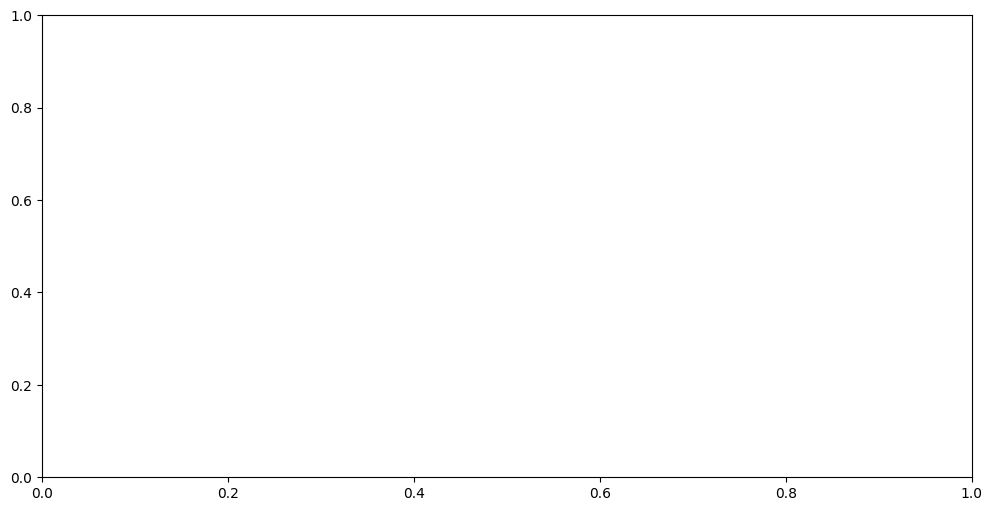

In [3]:
# Import required libraries
import matplotlib.pyplot as plt
import osmnx as ox
from shapely.geometry import Point
import geopandas as gpd

# Coordinates for the 5 largest cities on each continent
largest_cities = {
    'Africa': [
        (6.5244, 3.3792),    # Lagos, Nigeria
        (30.0444, 31.2357),  # Cairo, Egypt
        (-1.2921, 36.8219),  # Nairobi, Kenya
        (14.6928, -17.4467), # Dakar, Senegal
        (-26.2041, 28.0473)  # Johannesburg, South Africa
    ],
    'Asia': [
        (35.6895, 139.6917), # Tokyo, Japan
        (23.1291, 113.2644), # Guangzhou, China
        (28.7041, 77.1025),  # Delhi, India
        (31.2304, 121.4737), # Shanghai, China
        (19.0760, 72.8777)   # Mumbai, India
    ],
    'Europe': [
        (51.5074, -0.1278),  # London, UK
        (55.7558, 37.6173),  # Moscow, Russia
        (48.8566, 2.3522),   # Paris, France
        (41.9028, 12.4964),  # Rome, Italy
        (40.4168, -3.7038)   # Madrid, Spain
    ],
    'North America': [
        (40.7128, -74.0060), # New York City, USA
        (19.4326, -99.1332), # Mexico City, Mexico
        (34.0522, -118.2437),# Los Angeles, USA
        (45.5017, -73.5673), # Montreal, Canada
        (29.7604, -95.3698)  # Houston, USA
    ],
    'South America': [
        (-23.5505, -46.6333),# São Paulo, Brazil
        (-34.6037, -58.3816),# Buenos Aires, Argentina
        (-12.0464, -77.0428),# Lima, Peru
        (-22.9068, -43.1729),# Rio de Janeiro, Brazil
        (-3.7319, -38.5267)  # Fortaleza, Brazil
    ],
    'Oceania': [
        (-33.8688, 151.2093),# Sydney, Australia
        (-37.8136, 144.9631),# Melbourne, Australia
        (-36.8485, 174.7633),# Auckland, New Zealand
        (-27.4698, 153.0251),# Brisbane, Australia
        (-41.2865, 174.7762) # Wellington, New Zealand
    ]
}

# Flatten all city coordinates and create a GeoDataFrame
city_points = []
for cities in largest_cities.values():
    for lat, lon in cities:
        city_points.append(Point(lon, lat))
gdf = gpd.GeoDataFrame(geometry=city_points, crs='EPSG:4326')

# Get a simple world basemap using OSMnx
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('white')

# Plot the world boundaries using Natural Earth data
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")
world.plot(ax=ax, color='whitesmoke', edgecolor='gray', linewidth=0.5)

# Plot city markers as hexagons
gdf.plot(ax=ax, marker='h', color='deepskyblue', markersize=120, edgecolor='navy', linewidth=1.2, zorder=3)

# Set map limits and remove axes
ax.set_xlim(-180, 180)
ax.set_ylim(-60, 85)
ax.axis('off')

# Center the map at (0,0) with zoom level ~2 (world view)
ax.set_title('World Map: Largest Cities by Continent', fontsize=16, pad=20)

# Save as PNG
plt.savefig('world_largest_cities_hex.png', bbox_inches='tight', dpi=200)
plt.show()